In [1]:
import numpy as np

In [2]:
class Particle():
    
    def __init__(self,m,px,py,pz):
        """
        Create a particle from its mass and 3-momentum.
        
        Arguments:
            m = mass [GeV] 
            px = x-component of 3-momentum [GeV] 
            py = y-component of 3-momentum [GeV]
            pz = z-component of 3-momentum [GeV]
        """
        self.m  = m
        self.px = px
        self.py = py
        self.pz = pz
        self.vals = np.array([m,px,py,pz])
        self.Pcomps = self.vals[1::]

    def Pmag(self):
        """Get the magnitude of the total 3-momentum."""
        return np.sqrt(sum(self.Pcomps**2))
    
    def E(self):
        """Get the total energy."""
        return np.sqrt(self.m**2 + self.Pmag()**2)
    
    def P3dot(self,other):
        """Take the scalar (dot) product of a Particle's 3-momentum with another Particle's 3-momenum."""
        return sum(self.Pcomps * other.Pcomps)
    
    def P4dot(self,other):
        """Take the scalar (dot) product of a Particle's 4-momentum with another Particle's 4-momenum.
        4-momentum has the form: (E,px,py,pz)
        """
        return self.E()*other.E() - self.P3dot(other)
    
    def M(self,*other):
        """Calculate invariant mass of a Particle.
        
        If NO argument is given, gets the inv. mass of the Particle.
        If one argument is given, gets the sqrt(s) of the two Particles.
        """
        
        # 
        if len(other)==0: return self.m
        
        else:
            for part in other:
                crossterm = 2*self.P4dot(part)
                return np.sqrt( self.m**2 + part.m**2 + crossterm )
    
    def __add__(self, other):
        """Add two Particle objects together to make a new Particle.
           Useful for decays 

        NOTE: The 3-momentum components add, but the inv. mass must be calculated differently.
        """
        P = self.Pcomps + other.Pcomps
        return Particle(self.M(other),P[0],P[1],P[2])

# Problem 2

In [3]:
# Initialize Particles.
pion   = Particle(0.140,-0.255,-0.050,0.486)
proton = Particle(0.938,-0.488,-0.018,2.109)
X = pion + proton

In [4]:
print("pion values:",pion.vals)
print("proton values:",proton.vals)
print("X values:",X.vals,"\n")
print("X mass:",X.m)
print("X energy:",X.E())

pion values: [ 0.14  -0.255 -0.05   0.486]
proton values: [ 0.938 -0.488 -0.018  2.109]
X values: [ 1.13218789 -0.743      -0.068       2.595     ] 

X mass: 1.1321878919996906
X energy: 2.9278912928574896


In [5]:
# Check that the 3-dim and 4-dim scalar products are symmetric.
print(proton.P3dot(pion))
print(pion.P3dot(proton),"\n")
print(proton.P4dot(pion))
print(pion.P4dot(proton))

1.150314
1.150314 

0.1912027113953516
0.1912027113953516


# Problem 3

In [6]:
# Initialize Particles.
photon    = Particle(0,10,10,10)
proton_i  = Particle(0.938,-10,-10,-10)
pionminus = Particle(135,0,0,0)
proton_f  = Particle(0.938,0,0,0)

In [7]:
Egamma = (pionminus.m + 2*proton_i.m)/(2 + 2*proton_i.m/pionminus.m)
Egamma

67.96576380408716

In [8]:
photon    = Particle(0,Egamma,0,0)
proton_i  = Particle(0.938,-Egamma,0,0)
pionminus = Particle(135,0,0,0)
proton_f  = Particle(0.938,0,0,0)

In [9]:
# Calculate sqrt(s) at these Feynman diagram vertices:
print(photon.M(proton_i))  # first vertex
print(pionminus.M(proton_f))  # second vertex
true_sqrt_s = pionminus.M(proton_f)

135.93800000000002
135.938


# A Neat Graphical Proof:

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Scan over a range of photon momenta. 
momenta = np.arange(30,100,1,dtype=float)

sqrt_s_photon_list = []
sqrt_s_pion_list = []
for m in momenta:
    photon    = Particle(0,m,0,0)
    proton_i  = Particle(0.938,-m,0,0)
    pionminus = Particle(135,0,0,0)
    proton_f  = Particle(0.938,0,0,0)
    sqrt_s_photon_list.append( photon.M(proton_i) )
    sqrt_s_pion_list.append( pionminus.M(proton_f) )

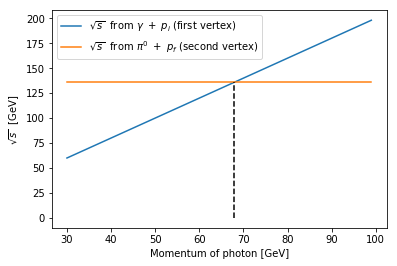

In [12]:
fig,ax = plt.subplots()

ax.set_xlabel(r'Momentum of photon [GeV]')
ax.set_ylabel(r'$\sqrt{s}$  [GeV]')

ax.plot(momenta,sqrt_s_photon_list, label=r'$\sqrt{s}$  from $\gamma\ +\ p_{i}$ (first vertex)')
ax.plot(momenta,sqrt_s_pion_list, label=r'$\sqrt{s}$  from $\pi^{0}\ +\ p_{f}$ (second vertex)')

# Add a line to easily see the intersection.
ax.plot([Egamma,Egamma],[0,true_sqrt_s],ls='dashed',c='k')

ax.legend()